In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import psycopg2
import psycopg2.extras

In [ ]:
#Menentukan Objective dari Case Study

import requests

url = "https://www.traveloka.com/id-id/hotel/search?spec=24-12-2024.25-12-2024.1.1.HOTEL_GEO.103859.Bandung.1&accommodationTypes=APARTMENT"

payload = {}
headers = {
  'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
  'accept-language': 'id',
  'cookie': '_gcl_au=1.1.966611197.1732031600; _cs_c=1; _fbp=fb.1.1732031626343.351136159300945429; _tt_enable_cookie=1; _ttp=NgxJtdkURoMk_MNfMXyflbLTjvH.tt.1; __rtbh.lid=%7B%22eventType%22%3A%22lid%22%2C%22id%22%3A%22yvvYulMZEMCoBkEgI4Zc%22%2C%22expiryDate%22%3A%222025-11-22T12%3A00%3A16.236Z%22%7D; __rtbh.uid=%7B%22id%22%3A%22undefined%22%2C%22eventType%22%3A%22uid%22%2C%22expiryDate%22%3A%222025-11-22T12%3A00%3A38.938Z%22%7D; tv-repeat-visit=true; countryCode=ID; _gid=GA1.2.1395616271.1734585990; tv_user={"authorizationLevel":100,"id":null}; accomSearchbarVariant=newDesign; _cs_id=14b79036-ab1d-a5a7-b02a-b394e5a76196.1732031600.5.1734613627.1734611036.1.1766195600473.1; amp_f4354c=BMxN1IQOZ-g5RzbGuQTN-J...1iffhl460.1iffhl460.0.5.5; _ga_RSRSMMBH0X=GS1.1.1734610115.4.1.1734614880.60.0.1859478217; _ga=GA1.1.1434812655.1732031600; cto_bundle=xLh1hl95dmdCclpBMGY1YkZVTEFwUVBvRHQxZURZUWdXV1NjbmxtVnFkdlUzRUxZbWh3eVdTU2tMY2VzSHBjdm9scENrampwU0tNMmcyS0kzb3RLNHlMa092JTJCc1dKQTI0JTJGeTNxcTNpQm9DcWd1Y3FDbWZKJTJCbUdXSnBjJTJCdzJxeHJlOERySXNuOWliMXFxeXBhTjJqczJQOE9ZdURmeEQlMkZqejIwMzM0MldyZXIxTGNyUkZtMVd0eDhOZ21wV2clMkZxT3VXdmpQMjBIemdFTzBaTGtaTmptYmN6cERUeEZDWUN3aWlrTG9LdUolMkZYQURsRXIycEpCamhiRkRWYVpvcEJBekZ4bXM; amp_1a5adb=Pvncf-QHDGbU0O1HweA3_1...1iffdtg14.1iffhl5d7.2r.5.30; _cs_s=7.0.0.9.1734617833850; aws-waf-token=925e3890-8916-4ad5-a3be-ccaefd4501d6:GgoAuQBgrToCAAAA:YmFxP758yE69nn2b5ouewRLksB/k7sKlteJCo7DFpLo6m/SSzG5fkMviRONuyVjJrYiJxHX3OTUZL8oqFpfiTQRxlV21OTu5KBJLJ3fHM/C73KDXpG2B5nni4GKI6RRXB2o/lCMe8LFrmhzL9I5sx3nXSYcwLrdoUu/04s31qMMDnksUpo9iwdmSbVQD7FTVH7U=; tvl=iPjavqdB4FhyVF2EmOWJtovOHPHqQYij73Wb/eumNuPy8L2XtKjIhs7lryWlgwLifuAks6X65RdmU5froYAoQLJfF5FGQpfY26ojN9nsH2igRgVG4GuAcDmhxlH0pgnUueUf4/hXlrCnhCqR7lG12U/mdpvLXmydry36xbKKOoK7YDiANc58o6MlxP8OxB3fHkogXCeSlrzWWVBsEMlDibC0m0NBm7TW3tUj5Shfb715/RymMpA4Y8cw/U8Q49lGHzFbCt6s3yk=~djAy; tvs=XnNeHTGQO/8Pkq45jPjsJ6g++3xI554CQTjhGKuFAl75EusARZZLpUSQWONgChjT6oWXYt0TEEuw+fe1TN2W8+lT0v9QacmMB/b2e9dcH2EX4aanbfYESfiD2DCPJ8Bxudi8H4LzEBnuGsHSlaX1+z6iQmBUQgm0ZfnAQObH1sZxgC+tOXYOLOqJkVY0XwJf3GWLzMjwIdjLvLxrDGXtXM5C4/JbBCVqM2MiugFZ7MF/Vyd1UBKUtzjwNRU8zOdYapFiosPDD+U1uvSticzoN7m44VLRpiHqZ6g=~djAy; _dd_s=rum=0&expire=1734616945446&logs=1&id=78671346-80ef-4d89-9b0e-3e36b9c4e2b7&created=1734610120834; tvl=3r91atIMwt3CIKCDtEWd8Ew6wYIb2XSwXba/+cPibGeWZfxSVVomJriRRZRoI/rYk5xERpk0sTMk4muNQS8lowrBOgB5gQ0U7k7IVJNqk2NsTGbfnIigrr/pPkQDpsB7kMa1PWs8EwiBcdk2OP+7Z6hJVNXOsgxnx/nH93dyNdX0m6e2JQmtIjzSUng7Dw0OffGDkdTq+59ClHJ3vOxrFsbKclTyY9X0GoWvh18oE8Z898fulpTcRZS5zXHc/KXFTdFyvsTBEdM=~djAy; tvs=V638CEmSf9B1YdYyGMhRUFD0YNl6Y+SeZCjuY6/wDrl3O5+vnHaXgl2S2Z7R4+6QAvKaHX79cKd4jQZufk3IbvH25iEH4vfhpiD6NtZ5i9qdF1XCNqrCsPj/wba/jjhP6PeWFr1LGsCHrUegiDfWhnkpJfMw+1WxPMJN4XgH3LUufDMUETSDxkjkDyJYEPx8DPDv3U/rdYD5hfrpkYc7tMTct7WU1yL0IBcADXUMrq2mP/l0nS43FoM5CjXianeALa8uPne/94uwigW4bHBqOgTgZLBSieh8Krc=~djAy',
  'priority': 'u=0, i',
  'referer': 'https://www.traveloka.com/id-id/hotel/search?spec=20-12-2024.21-12-2024.1.1.HOTEL_GEO.107442.Yogyakarta.2',
  'sec-ch-ua': '"Google Chrome";v="131", "Chromium";v="131", "Not_A Brand";v="24"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"macOS"',
  'sec-fetch-dest': 'document',
  'sec-fetch-mode': 'navigate',
  'sec-fetch-site': 'same-origin',
  'sec-fetch-user': '?1',
  'upgrade-insecure-requests': '1',
  'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)


<!DOCTYPE html><html style="height:100%" lang="id-id"><head nonce="JBfsu7xv/F99LFte/f9t8g==" crossorigin="anonymous"><meta name="viewport" content="width=device-width"/><meta charSet="utf-8"/><link rel="alternate" media="only screen and (max-width: 640px)" href="https://www.traveloka.com/id-id/hotel/search"/><link rel="canonical" href="https://www.traveloka.com/id-id/hotel/search"/><link rel="alternate" hrefLang="id-id" href="https://www.traveloka.com/id-id/hotel/search"/><link rel="alternate" hrefLang="en-id" href="https://www.traveloka.com/en-id/hotel/search"/><link rel="alternate" hrefLang="x-default" href="https://www.traveloka.com/en-en/hotel/search"/><link rel="alternate" hrefLang="en-my" href="https://www.traveloka.com/en-my/hotel/search"/><link rel="alternate" hrefLang="ms-my" href="https://www.traveloka.com/ms-my/hotel/search"/><link rel="alternate" hrefLang="en-ph" href="https://www.traveloka.com/en-ph/hotel/search"/><link rel="alternate" hrefLang="en-sg" href="https://www.tr

In [ ]:
import bs4

apart_bs4 = bs4.BeautifulSoup(response.content)
print(apart_bs4.prettify())

<!DOCTYPE html>
<html lang="id-id" style="height:100%">
 <head crossorigin="anonymous" nonce="JBfsu7xv/F99LFte/f9t8g==">
  <meta content="width=device-width" name="viewport"/>
  <meta charset="utf-8"/>
  <link href="https://www.traveloka.com/id-id/hotel/search" media="only screen and (max-width: 640px)" rel="alternate"/>
  <link href="https://www.traveloka.com/id-id/hotel/search" rel="canonical"/>
  <link href="https://www.traveloka.com/id-id/hotel/search" hreflang="id-id" rel="alternate"/>
  <link href="https://www.traveloka.com/en-id/hotel/search" hreflang="en-id" rel="alternate"/>
  <link href="https://www.traveloka.com/en-en/hotel/search" hreflang="x-default" rel="alternate"/>
  <link href="https://www.traveloka.com/en-my/hotel/search" hreflang="en-my" rel="alternate"/>
  <link href="https://www.traveloka.com/ms-my/hotel/search" hreflang="ms-my" rel="alternate"/>
  <link href="https://www.traveloka.com/en-ph/hotel/search" hreflang="en-ph" rel="alternate"/>
  <link href="https://www

In [ ]:
apart_bs4_list = apart_bs4.findAll(
    name = "div",
    attrs = {
        "data-testid": "list-card-inview-wrapper"
    }
)

apart_bs4_list

[<div data-testid="list-card-inview-wrapper"><div class="css-1dbjc4n" data-testid="tvat-searchListItem"><div class="css-1dbjc4n r-14lw9ot r-1xfd6ze r-da5iq2 r-zo7nv5 r-1loqt21 r-18u37iz r-1otgn73 r-1i6wzkk r-lrvibr r-13qz1uu" data-testid="tvat-searchListItem-content" style="height:226px;-webkit-transition-duration:0s;transition-duration:0s" tabindex="0"><div class="css-1dbjc4n r-1pi2tsx r-bnwqim r-7ce9ev r-1ipicw7 r-184en5c" data-testid="list-view-card-carousel"><div class="css-1dbjc4n r-391gc0 r-o8yidv r-1loqt21 r-bnwqim r-1otgn73 r-xi820d r-136ojw6" data-testid="list-view-card-main-image-pressable" style="height:161px" tabindex="0"><div class="css-1dbjc4n r-14lw9ot r-o8yidv r-13awgt0" style="height:161px"><div class="css-1dbjc4n r-1awozwy r-391gc0 r-o8yidv r-1pi2tsx r-1777fci r-u8s1d r-13qz1uu"><svg data-id="IcBrandTintedTraveloka" fill="none" height="36" viewbox="0 0 24 24" width="36" xmlns="http://www.w3.org/2000/svg"><g clip-path="url(#clip0_10880_5996)"><path d="M15.9886 16.0268C

In [ ]:
apart_bs4_list[2]

<div data-testid="list-card-inview-wrapper"><div class="css-1dbjc4n" data-testid="tvat-searchListItem"><div class="css-1dbjc4n r-14lw9ot r-1xfd6ze r-da5iq2 r-zo7nv5 r-1loqt21 r-18u37iz r-1otgn73 r-1i6wzkk r-lrvibr r-13qz1uu" data-testid="tvat-searchListItem-content" style="height:226px;-webkit-transition-duration:0s;transition-duration:0s" tabindex="0"><div class="css-1dbjc4n r-1pi2tsx r-bnwqim r-7ce9ev r-1ipicw7 r-184en5c" data-testid="list-view-card-carousel"><div class="css-1dbjc4n r-391gc0 r-o8yidv r-1loqt21 r-bnwqim r-1otgn73 r-xi820d r-136ojw6" data-testid="list-view-card-main-image-pressable" style="height:161px" tabindex="0"><div class="css-1dbjc4n r-14lw9ot r-o8yidv r-13awgt0" style="height:161px"><div class="css-1dbjc4n r-1awozwy r-391gc0 r-o8yidv r-1pi2tsx r-1777fci r-u8s1d r-13qz1uu"><svg data-id="IcBrandTintedTraveloka" fill="none" height="36" viewbox="0 0 24 24" width="36" xmlns="http://www.w3.org/2000/svg"><g clip-path="url(#clip0_10880_5996)"><path d="M15.9886 16.0268C1

In [ ]:
#Mengumpulkan Data yang Relevan

data = []

for apart_bs4_item in apart_bs4_list:
    apart_name = getattr(apart_bs4_item.find("h3", {"data-testid": "tvat-hotelName"}), "text", None)
    apart_original_price = getattr(apart_bs4_item.find("div", {"data-testid": "tvat-originalPrice"}), "text", None)
    apart_price = getattr(apart_bs4_item.find("div", {"data-testid": "tvat-hotelPrice"}), "text", None)
    apart_discount = getattr(apart_bs4_item.find("div", {"data-testid": "discount-rate-summary-text"}), "text", None)
    apart_location = getattr(apart_bs4_item.find("div", {"data-testid": "tvat-hotelLocation"}), "text", None)
    apart_rating = getattr(apart_bs4_item.find("div", {"data-testid": "tvat-ratingScore"}), "text", None)
    apart_image = getattr(apart_bs4_item.find("img", {"data-testid": "list-view-card-main-image"}), "attrs", {}).get("src", None)
    apart_features = [section.text for section in getattr(apart_bs4_item.find("div", {"data-testid": "hotel-feature-section"}), "children", [])]

    data.append({
        "apart_name": apart_name,
        "apart_original_price": apart_original_price,
        "apart_price": apart_price,
        "apart_discount": apart_discount,
        "apart_location": apart_location,
        "apart_rating": apart_rating,
        "apart_image": apart_image,
        "apart_features ": apart_features ,
    })

data

[{'apart_name': 'SKYLAND CITY HOTEL JATINANGOR',
  'apart_original_price': 'Rp 550.963',
  'apart_price': 'Rp 413.223',
  'apart_discount': '25% OFF',
  'apart_location': 'Jatinangor, Bandung',
  'apart_rating': ' 8.5 (390 ulasan)',
  'apart_image': 'https://ik.imagekit.io/tvlk/apr-asset/Ixf4aptF5N2Qdfmh4fGGYhTN274kJXuNMkUAzpL5HuD9jzSxIGG5kZNhhHY-p7nw/hotel/asset/67841228-a1f27b8414e5216b9af5ef5b309a8dd5.jpeg?_src=imagekit&tr=f-jpg,fo-auto,h-161,pr-true,q-80,w-300',
  'apart_features ': []},
 {'apart_name': 'youre at - Grand Setiabudi Apartment',
  'apart_original_price': 'Rp 2.044.122',
  'apart_price': 'Rp 1.533.092',
  'apart_discount': '25% OFF',
  'apart_location': 'Setiabudi, Bandung',
  'apart_rating': ' 9.1 (137 ulasan)',
  'apart_image': 'https://ik.imagekit.io/tvlk/apr-asset/Ixf4aptF5N2Qdfmh4fGGYhTN274kJXuNMkUAzpL5HuD9jzSxIGG5kZNhhHY-p7nw/hotel/asset/20051580-bec32a8e361d0820ed7977873cb82ddf.png?_src=imagekit&tr=f-jpg,fo-auto,h-161,pr-true,q-80,w-300',
  'apart_features ': ['

In [ ]:
import pandas as pd

df = pd.DataFrame(data)
df

,apart_name,apart_original_price,apart_price,apart_discount,apart_location,apart_rating,apart_image,apart_features
0,SKYLAND CITY HOTEL JATINANGOR,Rp 550.963,Rp 413.223,25% OFF,"Jatinangor, Bandung",8.5 (390 ulasan),https://ik.imagekit.io/tvlk/apr-asset/Ixf4aptF...,[]
1,youre at - Grand Setiabudi Apartment,Rp 2.044.122,Rp 1.533.092,25% OFF,"Setiabudi, Bandung",9.1 (137 ulasan),https://ik.imagekit.io/tvlk/apr-asset/Ixf4aptF...,"[Desain Estetik, Dapur kecil, Aksesibel bagi p..."
2,youre at - The Majesty Apartment,Rp 1.562.397,Rp 1.328.037,15% OFF,"Pasteur, Bandung",8.9 (424 ulasan),https://ik.imagekit.io/tvlk/apr-asset/Ixf4aptF...,"[Akses Layanan Streaming Gratis, Dapur kecil, ..."
3,PARAHYANGAN RESIDENCES by AYA Stays,Rp 1.694.215,Rp 1.016.529,40% OFF,"Ciumbuleuit, Bandung","9.1 (1,1rb ulasan)",https://ik.imagekit.io/tvlk/apr-asset/dgXfoyh2...,"[Sangat disukai oleh Rombongan Teman, Tanda kh..."
4,EL Royale Apartment by Alfarez Home,Rp 2.198.346,Rp 1.648.760,25% OFF,"Merdeka, Bandung",8.7 (48 ulasan),https://ik.imagekit.io/tvlk/apr-asset/dgXfoyh2...,"[Pool atau Snooker, Dapur kecil, Pusat kebugar..."
5,The Suite Metro Apartemen ( King Property ),Rp 480.107,Rp 360.081,25% OFF,"Batununggal, Bandung","7.9 (1,5rb ulasan)",https://ik.imagekit.io/tvlk/apr-asset/dgXfoyh2...,"[Area main anak, Dapur kecil, Pusat kebugaran,..."
6,Gateway Pasteur Apartemen By SPH,Rp 486.684,Rp 413.682,15% OFF,"Cicendo, Bandung",8.2 (226 ulasan),https://ik.imagekit.io/tvlk/apr-asset/dgXfoyh2...,[]
7,High Livin Apartment Baros,Rp 294.215,Rp 264.793,None,"Cimahi, Bandung","7.8 (1,2rb ulasan)",https://ik.imagekit.io/tvlk/apr-asset/dgXfoyh2...,"[Aksesibel bagi penyandang disabilitas, Check-..."
8,The Jarrdin Apartment by Omami,Rp 370.247,Rp 277.686,25% OFF,"Cihampelas, Bandung","8.5 (1,6rb ulasan)",https://ik.imagekit.io/tvlk/apr-asset/TzEv3ZUm...,"[Pool atau Snooker, Sewa mobil, Dapur kecil, P..."
9,Apartement Gateway Pasteur Bandung by TN Hospi...,Rp 424.242,Rp 318.182,25% OFF,"Cicendo, Bandung",8.1 (372 ulasan),https://ik.imagekit.io/tvlk/apr-asset/Ixf4aptF...,[]


In [ ]:
#ETL
def extract_traveloka(url):
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
        }
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an exception for bad status codes
        soup = BeautifulSoup(response.content, "html.parser")
        return soup
    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL: {e}")
        return None

In [ ]:
def transform_traveloka(soup):
    if not soup:
        return pd.DataFrame()

    apartments = []
    for item in soup.find_all("div", class_=re.compile("property-card-content")):
        try:
            nama = item.find("h3", class_=re.compile("property-name")).text.strip()
            harga_element = item.find("span", class_=re.compile("price__amount"))
            harga = harga_element.text.strip() if harga_element else None
            rating_element = item.find("div", class_=re.compile("rating"))
            rating = rating_element.text.strip() if rating_element else None
            lokasi = item.find("span", class_=re.compile("address")).text.strip()
            link_element = item.find("a", class_=re.compile("property-card"))
            link = "https://www.traveloka.com" + link_element["href"] if link_element else None

            harga = re.sub(r'[Rp\s.,]', '', str(harga)).strip() if isinstance(harga, str) else None
            harga = float(harga) if harga and harga.isdigit() else None
            rating = float(rating) if rating else None
            apartments.append([nama, harga, rating, lokasi, link])
        except AttributeError as e:
            print(f"Error extracting data from one item: {e}")
            continue

    df = pd.DataFrame(apartments, columns=['nama', 'harga', 'rating', 'lokasi', 'link'])
    return df

In [ ]:
def load_to_postgres(df, conn):
    if df.empty:
        print("No data to load.")
        return

    tuples = list(df.itertuples(index=False, name=None))
    try:
        with conn.cursor() as cur:
            psycopg2.extras.execute_values(cur, """
                INSERT INTO apartemen (nama, harga, rating, lokasi, link, tanggal_scraping)
                VALUES %s
            """, tuples)
            conn.commit()
        print(f"Successfully inserted {len(tuples)} rows.")
    except (Exception, psycopg2.DatabaseError) as error:
        print(f"Error inserting data: {error}")

In [ ]:
soup = BeautifulSoup(response.text, 'html.parser')
data = []
for item in soup.find_all('div', class_='item-class'):  # Ganti 'item-class' dengan class yang sesuai
    name = item.find('h2', class_='name-class').text.strip()  # Ganti 'name-class' dengan class yang sesuai
    price = item.find('span', class_='price-class').text.strip()  # Ganti 'price-class' dengan class yang sesuai
    rating = item.find('span', class_='rating-class').text.strip()  # Ganti 'rating-class' dengan class yang sesuai
    location = item.find('span', class_='location-class').text.strip()  # Ganti 'location-class' dengan class yang sesuai

    data.append({
        'Name': name,
        'Price': price,
        'Rating': rating,
        'Location': location
    })

In [ ]:
#Pembersihan dan Normalisasi Data

import re

def clean_harga(apart_price_str):
    if isinstance(apart_price_str, str):
        cleaned_str = re.sub(r'[Rp\s.,]', '', apart_price_str).strip()
        try:
            return float(cleaned_str)
        except ValueError:
            return None
    return None

df['apart_price'] = df['apart_price'].apply(clean_harga)

print(df)

                                           apart_name apart_original_price  \
0                       SKYLAND CITY HOTEL JATINANGOR           Rp 550.963   
1                youre at - Grand Setiabudi Apartment         Rp 2.044.122   
2                    youre at - The Majesty Apartment         Rp 1.562.397   
3                 PARAHYANGAN RESIDENCES by AYA Stays         Rp 1.694.215   
4                 EL Royale Apartment by Alfarez Home         Rp 2.198.346   
5         The Suite Metro Apartemen ( King Property )           Rp 480.107   
6                    Gateway Pasteur Apartemen By SPH           Rp 486.684   
7                          High Livin Apartment Baros           Rp 294.215   
8                      The Jarrdin Apartment by Omami           Rp 370.247   
9   Apartement Gateway Pasteur Bandung by TN Hospi...           Rp 424.242   
10        Apartement Grand Asia Afrika By Damar Akbar           Rp 661.157   
11        Savya ApartHotel by Kozystay - Bandung City         Rp

In [ ]:
#Pembersihan dan Normalisasi Data
import re
import numpy as np

def transform_data(df):
    if df is None:
        return None

    df['apart_price'] = df['apart_price'].apply(lambda x: re.sub(r'[Rp\s.,]', '', str(x)).strip() if isinstance(x, str) else x)
    df['apart_price'] = pd.to_numeric(df['apart_price'], errors='coerce')

    df['apart_rating'] = pd.to_numeric(df['apart_rating'], errors='coerce')
    return df

if df is not None:
    df_transformed = transform_data(df)
    print(df_transformed)

                                           apart_name apart_original_price  \
0                       SKYLAND CITY HOTEL JATINANGOR           Rp 550.963   
1                youre at - Grand Setiabudi Apartment         Rp 2.044.122   
2                    youre at - The Majesty Apartment         Rp 1.562.397   
3                 PARAHYANGAN RESIDENCES by AYA Stays         Rp 1.694.215   
4                 EL Royale Apartment by Alfarez Home         Rp 2.198.346   
5         The Suite Metro Apartemen ( King Property )           Rp 480.107   
6                    Gateway Pasteur Apartemen By SPH           Rp 486.684   
7                          High Livin Apartment Baros           Rp 294.215   
8                      The Jarrdin Apartment by Omami           Rp 370.247   
9   Apartement Gateway Pasteur Bandung by TN Hospi...           Rp 424.242   
10        Apartement Grand Asia Afrika By Damar Akbar           Rp 661.157   
11        Savya ApartHotel by Kozystay - Bandung City         Rp

In [ ]:
average_price = df['apart_price'].mean()
print(f'Average Price: ${average_price:.2f}')

Average Price: $754103.93


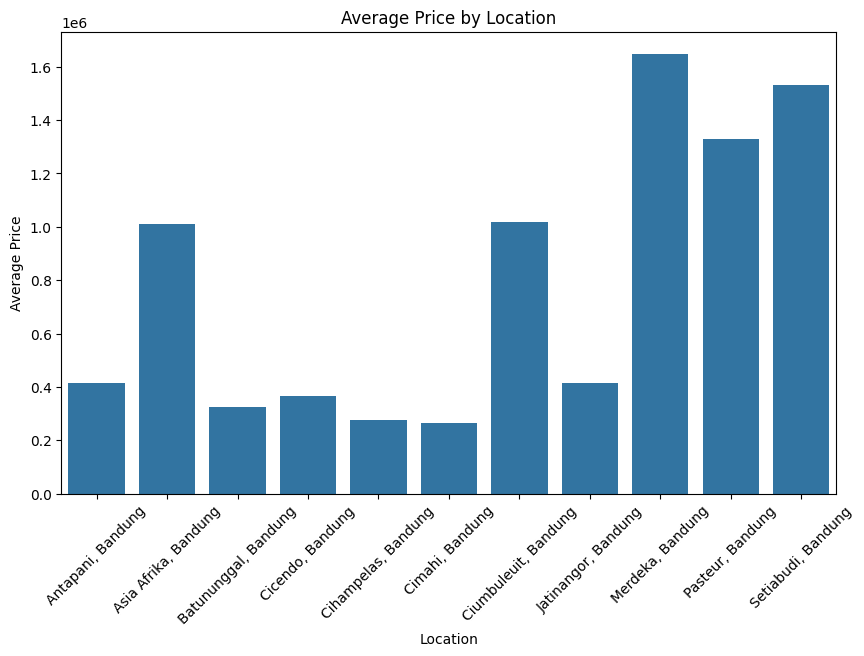

In [ ]:
#Menampilkan dan Menganalisis Data

import matplotlib.pyplot as plt
import seaborn as sns

category_summary = df.groupby('apart_location')['apart_price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='apart_location', y='apart_price', data=category_summary)
plt.title('Average Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()